In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import IncrementalPCA
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from math import isnan
from sklearn.preprocessing import scale
import geopandas as gpd
import contextily as ctx 


In [4]:
local_crs = 27700
place = "test"
lat = 55.86421405612109
lng = -4.251846930489373
country = "UK"
crs=4326
radius=1

In [5]:
grid = gpd.read_parquet(f"output/{place}/p4-grid-output.pq")

In [6]:
grid.set_index(['row', 'col'], inplace=True)

In [7]:
geo_col = grid[['geometry']]

In [8]:
geo_col

geometry
row col                                                   
5   28   POLYGON ((259890.532 666251.882, 259952.856 66...
12  27   POLYGON ((259803.063 665478.007, 259865.398 66...
15  27   POLYGON ((259792.288 665145.481, 259854.628 66...
14  28   POLYGON ((259858.218 665254.303, 259920.556 66...
    27   POLYGON ((259795.880 665256.323, 259858.218 66...
...                                                    ...
18  29   POLYGON ((259906.203 664808.915, 259968.547 66...
    30   POLYGON ((259968.547 664806.897, 260030.892 66...
    31   POLYGON ((260030.892 664804.880, 260093.236 66...
    32   POLYGON ((260093.236 664802.863, 260155.581 66...
    33   POLYGON ((260155.581 664800.848, 260217.926 66...

[646 rows x 1 columns]

In [9]:
grid.columns.tolist()

['tess_area_median',
 'tess_area_std',
 'tess_area_q25',
 'tess_area_q75',
 'tessellation_neighbours_median',
 'tessellation_neighbours_std',
 'tessellation_neighbours_q25',
 'tessellation_neighbours_q75',
 'tess_convexity_median',
 'tess_convexity_std',
 'tess_convexity_q25',
 'tess_convexity_q75',
 'tess_covered_area_median',
 'tess_covered_area_std',
 'tess_covered_area_q25',
 'tess_covered_area_q75',
 'tess_orientation_median',
 'tess_orientation_std',
 'tess_orientation_q25',
 'tess_orientation_q75',
 'tess_convexity_weight_median',
 'tess_convexity_weight_std',
 'tess_convexity_weight_q25',
 'tess_convexity_weight_q75',
 'tess_covered_area_weight_median',
 'tess_covered_area_weight_std',
 'tess_covered_area_weight_q25',
 'tess_covered_area_weight_q75',
 'tess_orientation_weight_median',
 'tess_orientation_weight_std',
 'tess_orientation_weight_q25',
 'tess_orientation_weight_q75',
 'tess_rea_theil_median',
 'tess_rea_theil_std',
 'tess_rea_theil_q25',
 'tess_rea_theil_q75',
 'bui

In [10]:
colsubset = grid.head().columns.tolist().remove("building_height")

In [11]:
grid.describe()

,tess_area_median,tess_area_std,tess_area_q25,tess_area_q75,tessellation_neighbours_median,tessellation_neighbours_std,tessellation_neighbours_q25,tessellation_neighbours_q75,tess_convexity_median,tess_convexity_std,...,building_neighbourhood_interbuilding_distance_weight_median,building_neighbourhood_interbuilding_distance_weight_std,building_neighbourhood_interbuilding_distance_weight_q25,building_neighbourhood_interbuilding_distance_weight_q75,building_orientation_weight_median,building_orientation_weight_std,building_orientation_weight_q25,building_orientation_weight_q75,building_height,entry_count
count,381.000000,343.000000,381.000000,381.000000,381.000000,343.000000,381.000000,381.000000,381.000000,343.000000,...,381.000000,343.000000,381.000000,381.000000,381.000000,343.000000,381.000000,381.000000,646.000000,381.000000
mean,8746.468870,5200.892881,6952.478702,11444.051609,0.144660,0.045498,0.128296,0.166022,0.925840,0.063407,...,24.249399,0.943482,23.853543,24.697425,12.971365,0.933998,12.536531,13.366975,35.839009,4.238845
std,7550.532491,4903.918283,6115.057036,8962.542128,0.052594,0.045314,0.044462,0.064948,0.064200,0.046387,...,11.625814,1.039209,11.519337,11.752212,4.072564,1.107370,3.833958,4.210020,75.276825,3.002308
min,1454.381551,0.000000,405.113262,1523.611149,0.001035,0.000000,0.001035,0.001035,0.494710,0.000000,...,12.335328,0.000000,11.931917,12.335328,2.298173,0.000000,2.153582,2.416251,2.000000,1.000000
25%,4270.804626,1657.186217,3522.886252,5468.128388,0.107807,0.018385,0.095669,0.121085,0.905061,0.028681,...,16.027671,0.309768,15.718722,16.289066,11.742331,0.229999,11.296363,11.973293,8.000000,2.000000
50%,6641.105177,3498.576134,4861.633755,8286.396325,0.144616,0.030776,0.129685,0.162663,0.940921,0.054005,...,21.238747,0.635486,20.924484,21.794048,13.066598,0.536404,12.827186,13.401069,10.000000,3.000000
75%,10709.316789,8122.937128,8467.772484,15074.728672,0.178606,0.058471,0.159988,0.204483,0.967270,0.084203,...,26.544980,1.150295,26.348004,27.284492,14.263346,1.153605,13.910068,14.421697,13.000000,5.000000
max,48487.119144,26943.878769,48487.119144,48487.119144,0.329490,0.353721,0.269396,0.394073,1.000000,0.277199,...,67.272383,6.685857,67.120535,67.424231,34.038711,7.174914,28.532297,34.499663,255.000000,21.000000


In [12]:
grid_dropped = grid.dropna(subset=["entry_count"], how='all')
grid_dropped = grid_dropped[grid_dropped['building_height'] != 255]
grid_dropped = grid_dropped[grid_dropped['entry_count'] > 2]

In [13]:
grid_dropped

tess_area_median  tess_area_std  tess_area_q25  tess_area_q75  \
row col                                                                  
12  27        2323.379370    5680.324447    1633.849231    9791.009066   
15  27        3539.157414    4896.586716    1118.950901    5684.893767   
14  28        6158.476863    2765.776484    2148.275946    6728.592707   
    20        6308.048325    2534.086244    3489.934186    7608.074029   
    19        3554.637627    6218.768210    3115.555833    6743.227117   
...                   ...            ...            ...            ...   
8   4         6018.846121    2600.322227    3769.803339    8187.070202   
12  25       12271.665540    2109.776698   10715.332010   12727.086123   
13  15        3792.162538    1841.792419    3070.585552    4887.094338   
3   18        1670.530995    6029.308077     935.842015    6485.810454   
4   7         6180.033898    4990.727733    3525.340025    8512.601278   

         tessellation_neighbours_median  tessellation_neighbours_std  \
row col                                                                
12  27                         0.220762                     0.064923   
15  27                         0.129902                     0.065977   
14  28                         0.118665                     0.022492   
    20                         0.152403                     0.031479   
    19                         0.176907                     0.047110   
...                                 ...                          ...   
8   4                          0.181329                     0.014838   
12  25                         0.135059                     0.051289   
13  15                         0.180837                     0.079314   
3   18                         0.109113                     0.121831   
4   7                          0.083879                     0.069960   

         tessellation_neighbours_q25  tessellation_neighbours_q75  \
row col                                                             
12  27                      0.149362                     0.252490   
15  27                      0.093582                     0.194877   
14  28                      0.107327                     0.134761   
    20                      0.135398                     0.162578   
    19                      0.141521                     0.213694   
...                              ...                          ...   
8   4                       0.169164                     0.194146   
12  25                      0.130249                     0.176876   
13  15                      0.154797                     0.229578   
3   18                      0.083369                     0.199368   
4   7                       0.066606                     0.133954   

         tess_convexity_median  tess_convexity_std  ...  \
row col                                             ...   
12  27                0.925861            0.037637  ...   
15  27                0.897903            0.061525  ...   
14  28                0.974963            0.021580  ...   
    20                0.999961            0.005950  ...   
    19                0.984226            0.087373  ...   
...                        ...                 ...  ...   
8   4                 0.986885            0.043909  ...   
12  25                0.972147            0.049678  ...   
13  15                0.971425            0.138169  ...   
3   18                0.945115            0.061948  ...   
4   7                 0.874980            0.068485  ...   

         building_neighbourhood_interbuilding_distance_weight_std  \
row col                                                             
12  27                                            0.381259          
15  27                                            1.487097          
14  28                                            2.176304          
    20                                            0.508050          
    19                       

In [14]:
grid_dropped.isnull().sum(axis=1).value_counts(ascending=False)

0    273
Name: count, dtype: int64

In [23]:
grid_dropped_geo = grid_dropped
grid_dropped = grid_dropped.drop(columns=["geometry"])

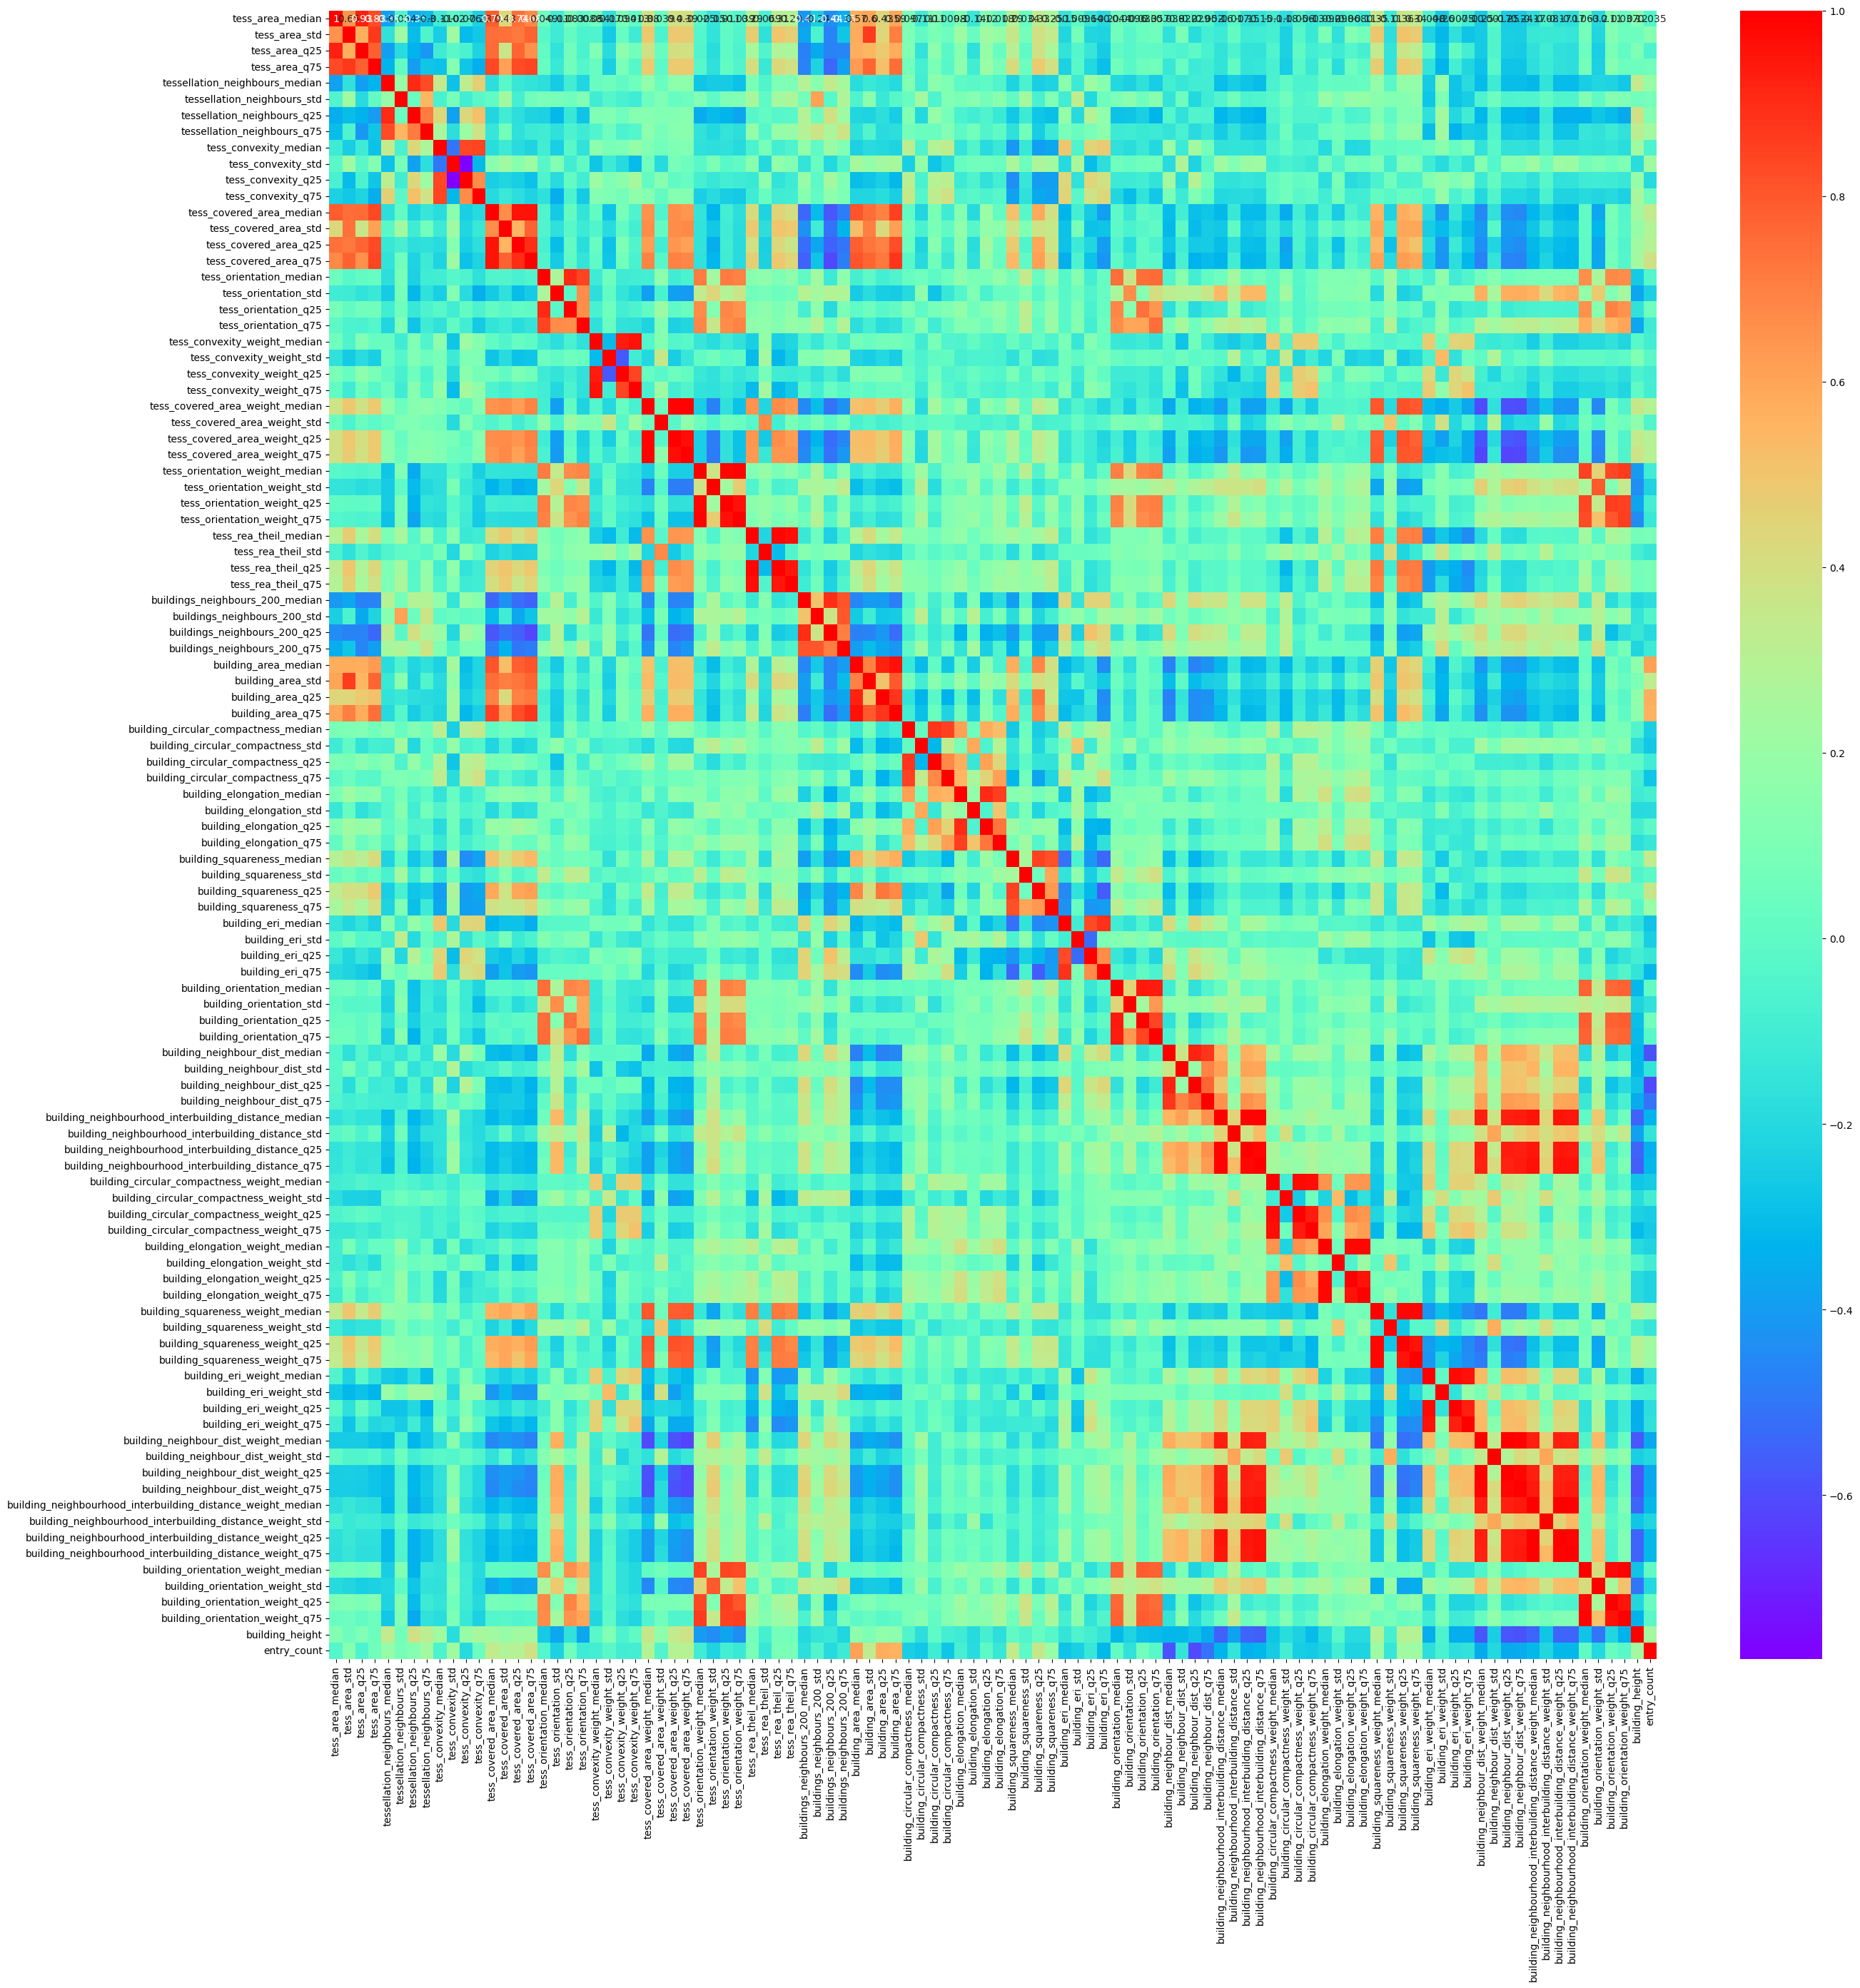

In [24]:
plt.figure(figsize = (30, 30))
sns.heatmap(grid_dropped.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

In [21]:
str(grid_dropped.index[0])

'(12, 27)'

In [25]:
scaler = StandardScaler()
tessellation_scaled = scaler.fit_transform(grid_dropped)

In [26]:
pca = PCA(svd_solver='randomized', random_state=50)


In [27]:
pca.fit(tessellation_scaled)

PCA(random_state=50, svd_solver='randomized')

In [28]:
features = grid_dropped.columns

In [29]:
pca.components_

array([[-0.10715123, -0.12293021, -0.10927665, ...,  0.02292563,
        -0.1077285 , -0.1007492 ],
       [ 0.07564984,  0.10413157,  0.06614829, ...,  0.20704185,
        -0.11454974, -0.00802355],
       [-0.11299105, -0.10911507, -0.12893745, ...,  0.14028275,
         0.07382457,  0.03147611],
       ...,
       [-0.0155395 ,  0.00299797,  0.01960528, ...,  0.03320102,
         0.00061263,  0.00510859],
       [-0.00894405,  0.00752878, -0.004014  , ..., -0.00841107,
         0.00349972,  0.00134174],
       [-0.00100777,  0.00311917, -0.00548389, ...,  0.03601432,
        -0.00034155, -0.000957  ]])

In [31]:
# Variance Ratio

pca.explained_variance_ratio_

array([2.16756821e-01, 1.33445008e-01, 8.93249335e-02, 7.26945346e-02,
       6.37999917e-02, 4.77746806e-02, 3.63168578e-02, 3.29313831e-02,
       2.91174401e-02, 2.39692586e-02, 2.18435716e-02, 1.96841187e-02,
       1.50833338e-02, 1.32538073e-02, 1.24085012e-02, 1.09499766e-02,
       1.02077041e-02, 1.01264479e-02, 9.85861723e-03, 8.98566606e-03,
       8.47818153e-03, 7.91343346e-03, 7.37337757e-03, 6.98178357e-03,
       6.54593713e-03, 6.18159927e-03, 5.72365496e-03, 5.27111172e-03,
       4.63830019e-03, 4.44200587e-03, 4.13549380e-03, 3.86589068e-03,
       3.37202724e-03, 3.22045908e-03, 2.94042656e-03, 2.88752320e-03,
       2.57154911e-03, 2.50515266e-03, 2.38515055e-03, 2.33020067e-03,
       2.06513297e-03, 1.81490151e-03, 1.74714001e-03, 1.62997878e-03,
       1.42228942e-03, 1.32242062e-03, 1.24989032e-03, 1.22706149e-03,
       1.10901363e-03, 1.02973338e-03, 9.62158861e-04, 8.49064251e-04,
       7.87656160e-04, 7.56797684e-04, 7.10068108e-04, 6.74697388e-04,
      

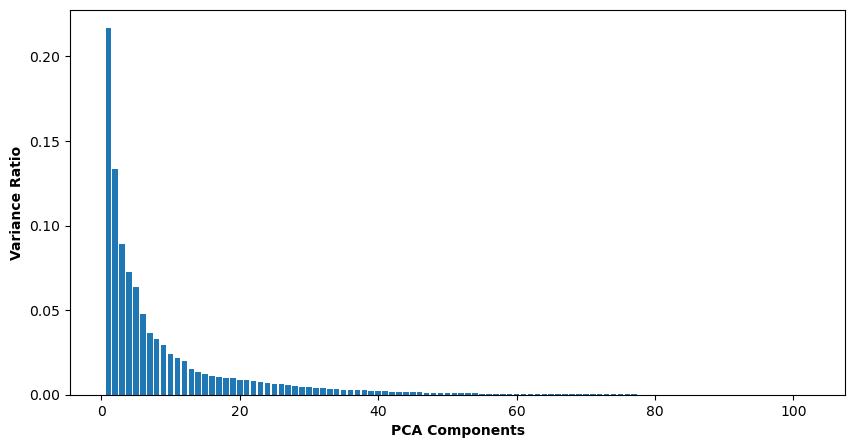

In [32]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize = (10, 5))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

plt.show()

In [33]:
# calculate the cumulative sum of explained variance ratios
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

org_col = list(grid_dropped.columns)

num_pc = np.argmax(cumulative_sum >= 0.95) + 1

pc_dict = {'Attribute': org_col}

pc_dict.update({f'PC_{i+1}':pca.components_[i] for i in range(num_pc)})

attributes_pca = pd.DataFrame(pc_dict)

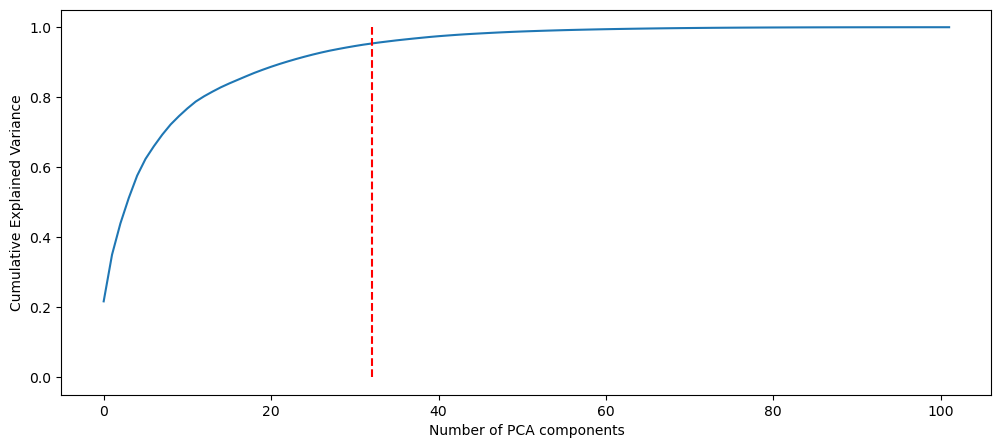

In [34]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=num_pc, ymax=1, ymin=0, colors="r", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [35]:
attributes_pca

,Attribute,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32
0,tess_area_median,-0.107151,0.075650,-0.112991,0.002342,-0.033193,0.146899,-0.023692,0.192187,-0.158954,...,-0.037474,-0.245702,-0.061932,-0.088100,-0.025914,0.117169,0.103174,-0.045744,0.153016,-0.104935
1,tess_area_std,-0.122930,0.104132,-0.109115,-0.050463,0.047223,0.042144,0.018832,0.060437,-0.056224,...,0.074962,0.048116,-0.042057,0.091930,-0.020522,-0.206095,-0.047276,0.066341,-0.042505,0.244896
2,tess_area_q25,-0.109277,0.066148,-0.128937,-0.003188,-0.065455,0.132526,-0.047086,0.193484,-0.152960,...,-0.053839,-0.276354,-0.057531,-0.059207,-0.031888,0.111461,0.077883,-0.078150,0.177396,-0.089710
3,tess_area_q75,-0.129447,0.103201,-0.132631,-0.010729,-0.009304,0.086111,0.008291,0.131776,-0.113063,...,0.009380,-0.013965,-0.023498,0.039452,0.061677,-0.090036,-0.024656,0.018240,0.056095,0.065004
4,tessellation_neighbours_median,-0.022398,-0.125894,0.131784,-0.123442,0.097034,-0.013483,0.105668,-0.153444,0.154242,...,0.094017,-0.153420,-0.151221,0.222877,0.055618,0.006564,0.010673,0.061271,-0.002815,-0.029861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,building_orientation_weight_std,0.128543,0.110013,0.005673,0.012877,-0.000910,0.012632,0.008789,-0.056503,0.019210,...,0.131607,-0.078159,-0.132251,-0.069336,0.049426,-0.017780,0.177168,0.157411,0.063867,-0.078043
98,building_orientation_weight_q25,-0.016993,0.197932,0.159527,0.014357,-0.082640,0.095511,-0.060952,-0.053804,-0.013289,...,-0.091082,-0.052812,0.033223,-0.018632,-0.033562,0.014902,-0.037760,0.075056,0.013486,-0.029935
99,building_orientation_weight_q75,0.022926,0.207042,0.140283,0.019659,-0.071781,0.090143,-0.059283,-0.067785,0.000775,...,-0.034653,-0.082613,-0.024875,-0.046739,-0.004497,0.002712,-0.001201,0.109421,0.020413,-0.047690
100,building_height,-0.107729,-0.114550,0.073825,-0.002417,0.057149,-0.031764,0.019904,0.063972,-0.005472,...,0.013792,-0.277884,0.056698,-0.120661,0.119447,0.346755,0.117521,0.398231,-0.229528,0.367571


In [36]:
# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=num_pc)

In [37]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(tessellation_scaled)
df_inc_pca

array([[ 1.47148915, -0.27918965,  0.50381578, ..., -0.68636195,
         0.16937684,  0.52347034],
       [ 5.19900913,  5.48665235, -2.20792251, ...,  0.34210955,
        -0.36592887, -0.91956842],
       [ 7.9167049 ,  3.89703683, -2.44884839, ...,  1.64432314,
         1.48458463, -1.05262001],
       ...,
       [-2.7120647 , -2.72405883, -1.67685979, ..., -0.59726356,
         0.03432524, -0.61145271],
       [10.88299171,  7.72455973,  1.64661834, ...,  0.43636064,
        -1.74808864, -0.10415006],
       [ 1.58799232,  4.81822511, -2.38900529, ..., -0.66144638,
         1.12395123,  0.4242835 ]])

In [38]:
components_df = pd.DataFrame(inc_pca.components_, columns=features)  # Adjust index based on n_components

In [39]:
# Assuming components_df is already defined as shown previously
number_of_features_to_describe = 15  # Change this to choose how many top features to describe for each component

# Iterating through each principal component
for component in components_df.index:
    print(f"Describing {component}:")
    
    # Sorting the features by their contribution to the component
    sorted_features = components_df.loc[component].abs().sort_values(ascending=False)
    
    # Picking the top features
    top_features = sorted_features.head(number_of_features_to_describe).index
    contributions = sorted_features.head(number_of_features_to_describe).values
    
    # Printing out the top features and their contributions
    for feature, contribution in zip(top_features, contributions):
        print(f" - {feature} with a loading of {contribution:.2f}")
    
    print("\n")  # Add a new line for better readability

Describing 0:
 - building_neighbour_dist_weight_q75 with a loading of 0.18
 - building_neighbour_dist_weight_median with a loading of 0.18
 - building_neighbour_dist_weight_q25 with a loading of 0.17
 - tess_covered_area_q75 with a loading of 0.17
 - tess_covered_area_weight_q25 with a loading of 0.17
 - tess_covered_area_weight_median with a loading of 0.17
 - tess_covered_area_weight_q75 with a loading of 0.17
 - tess_covered_area_median with a loading of 0.17
 - tess_covered_area_q25 with a loading of 0.17
 - building_area_q75 with a loading of 0.16
 - building_area_median with a loading of 0.16
 - building_neighbourhood_interbuilding_distance_weight_q75 with a loading of 0.15
 - building_squareness_weight_q25 with a loading of 0.15
 - building_neighbourhood_interbuilding_distance_weight_median with a loading of 0.15
 - building_neighbourhood_interbuilding_distance_weight_q25 with a loading of 0.15


Describing 1:
 - building_orientation_weight_q75 with a loading of 0.21
 - building

In [40]:
import pickle

with open(f"output/{place}/pca.pickle", 'wb') as f:
    pickle.dump(components_df, f)

In [41]:
# Creating new dataframe with Principal components


df_pca = pd.DataFrame(df_inc_pca, columns=[f"PC_{i+1}" for i in range(num_pc)])

In [42]:
if len(grid_dropped) == len(df_pca):
    df_pca.index = grid_dropped.index
else:
    print("Error: The number of rows in grid_dropped and df_pca do not match.")

In [43]:
geo_col

geometry
row col                                                   
5   28   POLYGON ((259890.532 666251.882, 259952.856 66...
12  27   POLYGON ((259803.063 665478.007, 259865.398 66...
15  27   POLYGON ((259792.288 665145.481, 259854.628 66...
14  28   POLYGON ((259858.218 665254.303, 259920.556 66...
    27   POLYGON ((259795.880 665256.323, 259858.218 66...
...                                                    ...
18  29   POLYGON ((259906.203 664808.915, 259968.547 66...
    30   POLYGON ((259968.547 664806.897, 260030.892 66...
    31   POLYGON ((260030.892 664804.880, 260093.236 66...
    32   POLYGON ((260093.236 664802.863, 260155.581 66...
    33   POLYGON ((260155.581 664800.848, 260217.926 66...

[646 rows x 1 columns]

In [44]:
df_pca_geometry = geo_col.join(df_pca, how="left")

In [45]:
columns_to_plot = df_pca_geometry.dropna().columns.drop('geometry')

In [61]:
# Number of rows and columns for the subplot grid
n_cols = 2  # You can adjust this based on your preference
n_rows = (len(columns_to_plot) + 1) // n_cols

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axes array for easy iteration, if there's more than one row
axes = axes.flatten() if n_rows > 1 else [axes]

# Loop through the columns and create a plot for each
for i, column in enumerate(columns_to_plot):
    # Plot with translucent colors
    df_pca_geometry.dropna().plot(column=column, ax=axes[i], legend=True, alpha=0.5)  # Adjust alpha for translucency

    # Add Contextily basemap
    ctx.add_basemap(axes[i], crs=df_pca_geometry.crs.to_string(), source=ctx.providers.OpenStreetMap)

    axes[i].set_title(column)
    axes[i].set_axis_off()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

ValueError: The 'url' dict should at least contain a 'url' key

Error in callback <function flush_figures at 0x7f0d379a7740> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [47]:
import pickle

with open(f"output/{place}/df_pca_geometry.pickle", 'wb') as f:
    pickle.dump(df_pca_geometry, f)

In [48]:
df_pca_with_uID = df_pca.copy()

In [49]:
df_pca_with_uID["uID"] = [str(i) for i in grid_dropped.index]

In [50]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS


In [51]:
# Hopkins score
Hopkins_score=round(hopkins(df_pca),2)

In [52]:
print(Hopkins_score)

0.75


The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.[1] It belongs to the family of sparse sampling tests. It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed.[2] A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.[3]

In [53]:
len(df_pca_with_uID)

273

In [1]:
df_pca.to_parquet(f"output/{place}/df_pca.pq")

NameError: name 'df_pca' is not defined